<a href="https://colab.research.google.com/github/maximilianoPizarro/JupyterNotebook/blob/master/wines_model_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO: Calidad de Vinos


**Descripción del proyecto:**   En este proyecto vamos a implementar los algoritmos de Regresion Lineal de Sklearn

**Indice:**


0.   [Preparando el entorno](#section0)
1.  [Entendimiento del negocio](#section1)
2.  [Entendimiento de los datos](#section2)
3.  [Modelado](#section3)
4.  [Preparación de los datos](#section4)
5.  [Implementación](#section5)
6.  [Evaluación](#section6)
7.  [Presentación](#section7)
8.  [Exportar Modelo](#section8)




###0) Preparando el entorno



Pasos de control

**0.**   Controlar que el entorno este configurado con python 3 (menu -> Entorno de ejecución -> Cambiar tipo de entorno de Ejecución)<br/>
**1.**   Instalar las librerias necesarias (haciendo uso de ! y apt-get o pip)<br/>
**2.**   Importar modulos <br/>
**3.**   Cargar al servidor la base de datos<br/>

In [0]:
#1 Instalar librerias

In [0]:
#2 importar librerias
import pandas as pd #libreria para trabajar matrices de datos
import matplotlib.pyplot as plt #libreria de visualizaciones
import seaborn as sns #frame de visualizaciones sobre matplotlib
import numpy as np
%matplotlib inline
#mostrar las visualizaciones en el entorno de manera predeterminada.

In [13]:
#3 Descargar la bd
!wget -O wine.csv "https://drive.google.com/uc?export=download&id=1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs"


--2019-05-28 16:45:08--  https://drive.google.com/uc?export=download&id=1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.100, 74.125.195.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m41dsk2a4n49nudtu3h41ofb4dsqgmlp/1559059200000/11351302820947401900/*/1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs?e=download [following]
--2019-05-28 16:45:09--  https://doc-0s-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m41dsk2a4n49nudtu3h41ofb4dsqgmlp/1559059200000/11351302820947401900/*/1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs?e=download
Resolving doc-0s-as-docs.googleusercontent.com (doc-0s-as-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-0s-as-docs.googleusercontent.com (doc-0s

# Prototipo Regresion


###1) Entendimiento del Negocio






In [0]:
df = pd.DataFrame(pd.read_csv(filepath_or_buffer='wine.csv',sep=",",index_col=0))


Se estudiará un dataset de vinos y se armara un modelo para predecir su calidad


In [15]:
print(df.describe()) #repasando las variables

       fixed acidity  volatile acidity  ...      alcohol      quality
count    5197.000000       5197.000000  ...  5197.000000  5197.000000
mean        7.213854          0.338667  ...    10.493907     5.818164
std         1.287939          0.164251  ...     1.194671     0.873126
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]


<div id="section2"></div>
##2) Entendimiento de los Datos



In [16]:
df.info() #Viendo el tipo de dato

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5196
Data columns (total 13 columns):
fixed acidity           5197 non-null float64
volatile acidity        5197 non-null float64
citric acid             5197 non-null float64
residual sugar          5197 non-null float64
chlorides               5197 non-null float64
free sulfur dioxide     5197 non-null float64
total sulfur dioxide    5197 non-null float64
density                 5197 non-null float64
pH                      5197 non-null float64
sulphates               5197 non-null float64
alcohol                 5197 non-null float64
quality                 5197 non-null int64
type                    5197 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 568.4+ KB


###2) Entendimiento de los datos

In [17]:
df.describe() #descripción de la bd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.213854,0.338667,0.318628,5.469983,0.056053,30.733019,115.941409,0.994686,3.217333,0.529529,10.493907,5.818164
std,1.287939,0.164251,0.146342,4.715483,0.035773,17.571323,56.604841,0.002933,0.159624,0.148697,1.194671,0.873126
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992370,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.200000,0.064000,42.000000,156.000000,0.996960,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,146.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [18]:
#Convertimos variables cualitativas en variables discretas
#Dividimos el dataset segun la variable target en este caso se trata de calidad
df.type=df.type=="red"
X = df.drop(columns=['quality'])
y = df["quality"] #variable target]
X_names = sorted(pd.read_csv(filepath_or_buffer='wine.csv',sep=",",index_col=0))
X_names



['alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'quality',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'type',
 'volatile acidity']

**Recordamos que la distirbución de la variable target no tenia una distribución normal**

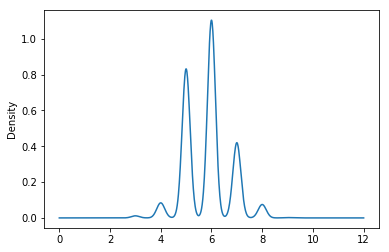

In [19]:
#distribución de la calidad
df['quality'].plot.kde()


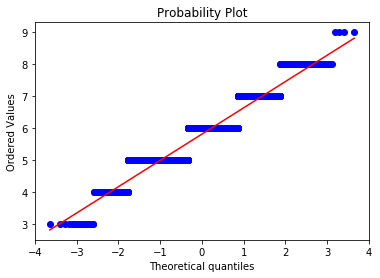

In [20]:
from scipy import stats #visualizar la distribución de probabilidades
#sirve para comprender si la variable en estudio tiene una distirbución normal
#necesaria para aplicar modelos paramétricos
stats.probplot(df['quality'], plot=plt)
plt.show()


Veremos en la etapa de preparación de los datos como corregir este problema.


### 3) Modelado

Usaremos modelo de regresion de sklearn




---

***Nota:**  Veamos que nos ofrece la libreria a utilizar para regression (http://scikit-learn.org/stable/modules/linear_model.html)

###4) Preparación de los datos

En esta etapa realizaremos 2 actividades:

1.   Estandarizaremos los atributos
2.   Resolveremos el problema de separar el dataset



4.1) Estandarización de variables

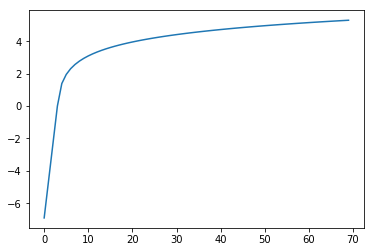

In [21]:
logFunction = np.log( ([0.001, 0.01, 0.1] + list(range(1, 200, 3)) ) )
plt.plot(logFunction)
plt.show()

In [0]:
#
y_log = df['quality']


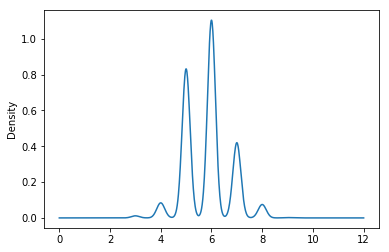

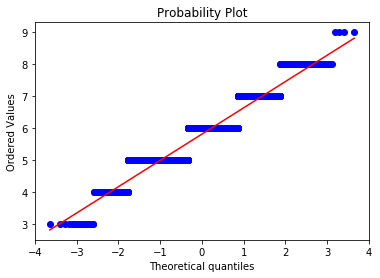

In [23]:
#distribución de la calidad
y_log.plot.kde()
plt.show()
#sirve para comprender si la variable en estudio tiene una distirbución normal
#necesaria para aplicar modelos paramétricos
stats.probplot(y_log, plot=plt)
plt.show()

4.2) Split Dataset

In [0]:
from sklearn.model_selection import train_test_split

debemos definir 2 elementos:
1.   El porcentaje de registros que utilizaremos para testear
2.   Un valor aleatorio fijo para mantener la reproducción del experimento



In [0]:
test_size = 0.3 # 30% de la población (usualmente se elige entre un 30 y un 15% según la cantidad de registros)
RANDOM_STATE = 42 #un valor aleatorio

In [0]:
#por motivos de comparación tendremos separadas en 2 bds sin modificar
#raw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)

y_log_train = np.log(y_train)
y_log_test = np.log(y_test)

In [27]:
print("train: {} vs test {}".format(len(X_train), len(X_test)))

train: 3637 vs test 1560


###5) Implementación

5.1) Modelo Regresión Lineal

In [0]:
from sklearn.linear_model import LinearRegression #importamos el modelo a utilizar

**No estandarizado**

In [0]:
#entrenando el modelo en el dataset sin estandarizar
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) 

5.2) Otros modelos de regresión

In [0]:
#from sklearn.linear_model import Ridge, Lasso # http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
from sklearn.tree import DecisionTreeRegressor # http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
from sklearn.svm import SVR #http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

**No estandarizado**

In [31]:
#entrenando el modelo en el dataset sin modificar
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test) 

#DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test) 

#SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test) 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


5.3) Otros modelos ...

¿Y que pasa si intento generar otros modelos del mismo tipo, como hicimos con LinearRegression para DecisionTreeRegressor?

**No estandarizado**

In [0]:
#Nuestro actual ganador!!
#DecisionTreeRegressor opc 1
dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test) 

#adaptemos la cantidad minima de registros que debe tener una regla para poder dividirse en nuevas reglas
#el valor por defecto de "min_samples_split" es 2 (ver documentación)

#DecisionTreeRegressor opc 2
dtr2 = DecisionTreeRegressor(min_samples_split=20, random_state=RANDOM_STATE)
dtr2.fit(X_train, y_train)
y_pred_dtr2 = dtr2.predict(X_test) 


#DecisionTreeRegressor opc 3
dtr3 = DecisionTreeRegressor(min_samples_split=10, random_state=RANDOM_STATE)
dtr3.fit(X_train, y_train)
y_pred_dtr3 = dtr3.predict(X_test) 



5.4)

In [0]:
#from sklearn.linear_model import Ridge, Lasso # http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
from sklearn.tree import DecisionTreeRegressor # http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
from sklearn.svm import SVR #http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [0]:
??SVR

In [35]:
SVR(C=1.0)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
SVR(C=2.0)


SVR(C=2.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [50]:
#parametros
grid_params_svr = [{'m__C': [0.1,1.0, 2.0]}]
pipe_svr = Pipeline([('scl', StandardScaler()),
                    ('m', SVR())])
pipe_svr


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('m',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [51]:
# Construct grid searches
jobs = -1
cv = 10

#refit=True, entrena el mejor modelo obtenido con todo el dataset! :D
#verbose => mientras mayor el número, más info va mostrando.
gs_svr = GridSearchCV(estimator=pipe_svr,
            param_grid=grid_params_svr,
            cv=cv,
            verbose=2,
            n_jobs=jobs)
gs_svr

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('m',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=-1, param_grid=[{'m__C': [0.1, 1.0, 2.0]}],
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [52]:
# Fit grid search	
gs_svr.fit(X_train, y_train)
# Mejor params
print('Mejor params: %s' % gs_svr.best_params_)
# Mejor resultado
print('Mejor resultado: %.3f' % gs_svr.best_score_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.3s finished


Mejor params: {'m__C': 2.0}
Mejor resultado: 0.386


In [0]:
#Arboles vs SVR

#parametros
grid_params_svr = [{'clf__kernel': ['linear', 'rbf'],'clf__C': [0.1,1.0, 2.0]}]
pipe_svr = Pipeline([('scl', StandardScaler()),
                    ('clf', SVR())])

#parametros
grid_params_dtr = [{
                    'clf__min_samples_split': [2, 5, 8, 10]}]
pipe_dtr = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeRegressor())])

In [0]:
# Construct grid searches
jobs = 1
cv = 10

#refit=True, entrena el mejor modelo obtenido con todo el dataset! :D
#verbose => mientras mayor el número, más info va mostrando.
gs_svr = GridSearchCV(estimator=pipe_svr,
            param_grid=grid_params_svr,
            cv=cv,
            verbose=1,
            n_jobs=jobs)

gs_dtr = GridSearchCV(estimator=pipe_dtr,
            param_grid=grid_params_dtr,
            cv=cv,
            # metrics="",
            verbose=1,
            n_jobs=jobs)

###6) Evaluación

In [0]:
from sklearn.metrics import mean_squared_error #más info: http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

6.1) Compararemos los resultados predichos entre los 2 modelos

In [57]:
#dataset sin estandarizar
MSE = mean_squared_error(y_test, y_pred)
print("MSE = {}".format(MSE))

MSE = 0.5316649993238518


6.2) Compararemos los resultados predichos entre los 6 modelos

In [59]:
#dataset sin estandarizar
MSE = mean_squared_error(y_test, y_pred_lr)
print("MSE lr = {}".format(MSE))

MSE = mean_squared_error(y_test, y_pred_dtr)
print("MSE dtr = {}".format(MSE))

MSE = mean_squared_error(y_test, y_pred_svr)
print("MSE svr = {}".format(MSE))

MSE lr = 0.5316649993238518
MSE dtr = 0.764102564102564
MSE svr = 0.5791591203410703


In [0]:
#dataset sin estandarizar
MSE = mean_squared_error(y_test, y_pred_dtr)
print("MSE dtr = {}".format(MSE))

MSE = mean_squared_error(y_test, y_pred_dtr2)
print("MSE dtr 5 = {}".format(MSE))

MSE = mean_squared_error(y_test, y_pred_dtr3)
print("MSE dtr 10 = {}".format(MSE))

MSE dtr = 0.016666666666666666
MSE dtr 5 = 0.018069322656957064
MSE dtr 10 = 0.0169181801994302


In [61]:
dtr3 #imprimimos las caracteristicas del modelo

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

###7) Presentación

Por el tipo de problema a desarrollar los modelos de regresion no impactan significamente en el resultado

7.1) Impacto de variables

In [62]:
[print("{} : {:.4f}".format(x, y)) for x, y in zip(X_names, dtr.feature_importances_)]


alcohol : 0.0552
chlorides : 0.1298
citric acid : 0.0509
density : 0.0819
fixed acidity : 0.0611
free sulfur dioxide : 0.0823
pH : 0.0690
quality : 0.0557
residual sugar : 0.0591
sulphates : 0.0896
total sulfur dioxide : 0.2638
type : 0.0015


[None, None, None, None, None, None, None, None, None, None, None, None]

7.3) Impacto de variables

In [63]:
[print("{} : {:.4f}".format(x, y)) for x, y in zip(X_names, dtr3.feature_importances_)]

alcohol : 0.0531
chlorides : 0.1382
citric acid : 0.0437
density : 0.0761
fixed acidity : 0.0592
free sulfur dioxide : 0.0777
pH : 0.0659
quality : 0.0493
residual sugar : 0.0516
sulphates : 0.0878
total sulfur dioxide : 0.2965
type : 0.0010


[None, None, None, None, None, None, None, None, None, None, None, None]

###8) Exportar modelo

In [0]:
from sklearn.externals import joblib

In [65]:
joblib.dump(lr, "regresionlinear.joblib")

['regresionlinear.joblib']

###9) Importar modelo

In [0]:
from joblib import dump, load

cargar_modelo = load("regresionlinear.joblib")


9.1) Importamos nuevo dataset 

In [0]:
import requests,io

url="https://raw.githubusercontent.com/maximilianoPizarro/JupyterNotebook/master/wine_test_predict.csv"
s=requests.get(url).content

dframe = pd.DataFrame(pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0))
dframe.type=dframe.type=="red"

9.2) Realizamos las prediccion con el modelo cargado


In [68]:
cargar_modelo.predict(dframe)

array([6.17173898, 5.90652658, 5.63932018, ..., 6.29342387, 5.42046935,
       6.43216691])

9.3) Creamos un nuevo dataframe con el resultado y guardamos en archivo csv

In [69]:
resultado = pd.DataFrame(columns= ['ID', 'y_pred'])
resultado['ID']=dframe.index
resultado['y_pred']=cargar_modelo.predict(dframe)
resultado

,ID,y_pred
0,0,6.171739
1,1,5.906527
2,2,5.639320
3,3,4.820230
4,4,5.653701
5,5,5.675818
6,6,5.301559
7,7,5.675579
8,8,6.013045
9,9,6.263892


In [0]:
resultado.to_csv('regresion-pizarro_maximiliano-wine.csv')